<a href="https://colab.research.google.com/github/DanielP0111/REU-Code/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uploading all synthetic voice files
from google.colab import files
import os

uploaded = files.upload()

# uploaded files
os.makedirs("syn_aud", exist_ok=True)
for fname in uploaded.keys():
    os.rename(fname, f"syn_aud/{fname}")


Saving train_sample_0.wav to train_sample_0.wav
Saving train_sample_1.wav to train_sample_1.wav
Saving train_sample_2.wav to train_sample_2.wav
Saving train_sample_3.wav to train_sample_3.wav
Saving train_sample_4.wav to train_sample_4.wav
Saving train_sample_5.wav to train_sample_5.wav
Saving train_sample_6.wav to train_sample_6.wav
Saving train_sample_7.wav to train_sample_7.wav
Saving train_sample_8.wav to train_sample_8.wav
Saving train_sample_9.wav to train_sample_9.wav
Saving train_sample_10.wav to train_sample_10.wav
Saving train_sample_11.wav to train_sample_11.wav
Saving train_sample_12.wav to train_sample_12.wav
Saving train_sample_13.wav to train_sample_13.wav
Saving train_sample_14.wav to train_sample_14.wav
Saving train_sample_15.wav to train_sample_15.wav
Saving train_sample_16.wav to train_sample_16.wav
Saving train_sample_17.wav to train_sample_17.wav
Saving train_sample_18.wav to train_sample_18.wav
Saving train_sample_19.wav to train_sample_19.wav
Saving train_sample_

In [ ]:
import os
import librosa
import numpy as np
import requests
import tempfile
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from collections import Counter


X_all, y_all = [], []

folders = {
    'depressed': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/depressed',
    'healthy': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/healthy'
}

for label, api_url in folders.items():
    response = requests.get(api_url)
    if response.status_code == 200:
        for f in response.json():
            if f['name'].endswith('.wav'):
                file_url = f"https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/{label}/{f['name']}"
                with tempfile.NamedTemporaryFile(suffix=".wav") as temp_audio:
                    r = requests.get(file_url)
                    temp_audio.write(r.content)
                    temp_audio.flush()
                    try:
                        y_audio, sr = librosa.load(temp_audio.name)
                        mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
                        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
                        feature = np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])
                        X_all.append(feature)
                        y_all.append(1 if label == "depressed" else 0)
                    except Exception as e:
                        print(f"Skipped real sample due to error: {e}")

print(f"Loaded {len(X_all)} real audio samples")


syn_files = [f for f in os.listdir("syn_aud") if f.endswith(".wav")]
selected_syn = syn_files[:10]

for fname in selected_syn:
    path = os.path.join("syn_aud", fname)
    try:
        y_audio, sr = librosa.load(path)
        mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        feature = np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])
        X_all.append(feature)
        y_all.append(1)
    except Exception as e:
        print(f"Skipped synthetic sample due to error: {e}")

print(f"Loaded total {len(X_all)} samples (real + synthetic)")

# train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# print results
print("\nEvaluation Results (80/20 Split)")
print("Accuracy:", round(accuracy, 4))
print("F1 Score:", round(f1, 4))
print("Classification Report:\n", report)

print("\nSample Breakdown")
print("Training Set:", Counter(y_train))
print("Test Set:", Counter(y_test))


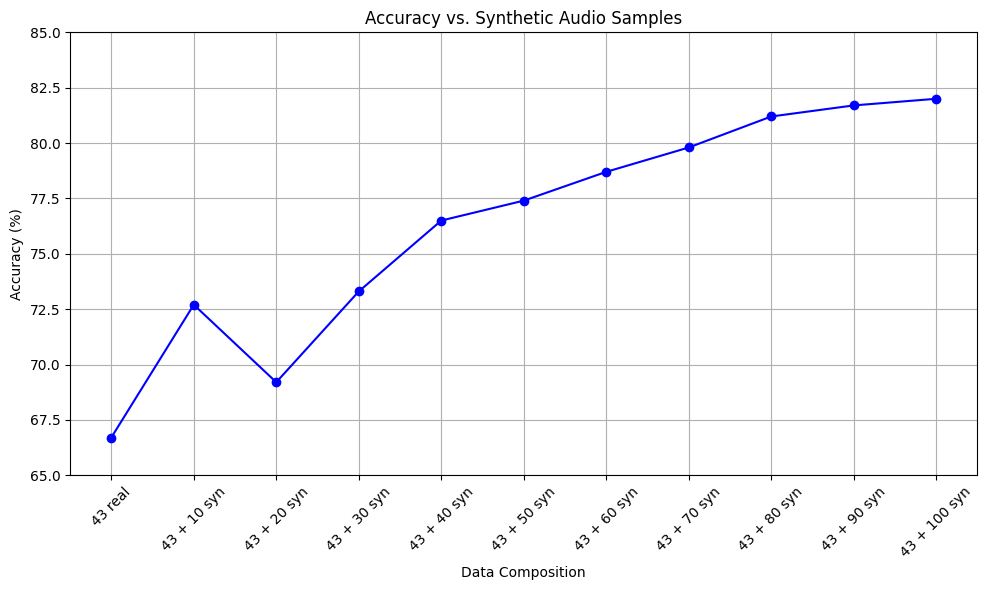

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Data": [
        "43 real",
        "43 + 10 syn",
        "43 + 20 syn",
        "43 + 30 syn",
        "43 + 40 syn",
        "43 + 50 syn",
        "43 + 60 syn",
        "43 + 70 syn",
        "43 + 80 syn",
        "43 + 90 syn",
        "43 + 100 syn"
    ],
    "Accuracy": [
        66.7, 72.7, 69.2, 73.3, 76.5,
        77.4, 78.7, 79.8, 81.2, 81.7, 82.0
    ]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.plot(df["Data"], df["Accuracy"], marker='o', linestyle='-', color='blue')
plt.xticks(rotation=45)
plt.ylim(65, 85)
plt.grid(True)

plt.title("Accuracy vs. Synthetic Audio Samples")
plt.xlabel("Data Composition")
plt.ylabel("Accuracy (%)")

plt.tight_layout()
plt.show()


In [ ]:
# 10 depressed for testing
import os
import librosa
import numpy as np
import requests
import tempfile
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from collections import Counter

X_real_train, y_real_train = [], []

X_real_test, y_real_test = [], []

folders = {
    'depressed': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/depressed',
    'healthy': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/healthy'
}

depressed_samples = []
healthy_samples = []

for label, api_url in folders.items():
    response = requests.get(api_url)
    if response.status_code == 200:
        for f in response.json():
            if f['name'].endswith('.wav'):
                file_url = f"https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/{label}/{f['name']}"
                sample = {
                    "label": 1 if label == "depressed" else 0,
                    "url": file_url
                }
                if label == "depressed":
                    depressed_samples.append(sample)
                else:
                    healthy_samples.append(sample)

depressed_test = depressed_samples[:10]
depressed_train = depressed_samples[10:]

# (depressed + healthy)
for sample in depressed_train + healthy_samples:
    with tempfile.NamedTemporaryFile(suffix=".wav") as temp_audio:
        r = requests.get(sample['url'])
        temp_audio.write(r.content)
        temp_audio.flush()
        try:
            y_audio, sr = librosa.load(temp_audio.name)
            mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
            log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
            feature = np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])
            X_real_train.append(feature)
            y_real_train.append(sample['label'])
        except Exception as e:
            print(f"Skipped real training sample due to error: {e}")

# 10 depressed samples
for sample in depressed_test:
    with tempfile.NamedTemporaryFile(suffix=".wav") as temp_audio:
        r = requests.get(sample['url'])
        temp_audio.write(r.content)
        temp_audio.flush()
        try:
            y_audio, sr = librosa.load(temp_audio.name)
            mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
            log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
            feature = np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])
            X_real_test.append(feature)
            y_real_test.append(1)
        except Exception as e:
            print(f"Skipped real test sample due to error: {e}")


X_syn_train, y_syn_train = [], []

for fname in os.listdir("syn_aud"):
    if fname.endswith(".wav"):
        path = os.path.join("syn_aud", fname)
        try:
            y_audio, sr = librosa.load(path)
            mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
            log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
            feature = np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])
            X_syn_train.append(feature)
            y_syn_train.append(1)
        except Exception as e:
            print(f"Skipped synthetic sample due to error: {e}")
# train/test
X_train = np.array(X_real_train + X_syn_train)
y_train = np.array(y_real_train + y_syn_train)

X_test = np.array(X_real_test)
y_test = np.array(y_real_test)

print("\nSample Counts:")
print("Real data:", Counter(y_real_train))
print("Synthetic data:", Counter(y_syn_train))


clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nEvaluation")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Classification Report:\n", report)



Sample Counts:
Real data: Counter({0: 24, 1: 9})
Synthetic data: Counter({1: 120})

Evaluation
Accuracy: 0.4
F1 Score: 0.5714285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57        10

    accuracy                           0.40        10
   macro avg       0.50      0.20      0.29        10
weighted avg       1.00      0.40      0.57        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 5 depressed and 5 healthy for testing
import os
import librosa
import numpy as np
import requests
import tempfile
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from collections import Counter


real_depressed = []
real_healthy = []

folders = {
    'depressed': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/depressed',
    'healthy': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/healthy'
}

for label, api_url in folders.items():
    response = requests.get(api_url)
    if response.status_code == 200:
        for f in response.json():
            if f['name'].endswith('.wav'):
                file_url = f"https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/{label}/{f['name']}"
                sample = {
                    "label": 1 if label == "depressed" else 0,
                    "url": file_url
                }
                if label == "depressed":
                    real_depressed.append(sample)
                else:
                    real_healthy.append(sample)


# used 5 depressed and 5 healthy for testing
test_samples = real_depressed[:10] + real_healthy[:10]
train_samples = real_depressed[10:] + real_healthy[10:]

X_real_train, y_real_train = [], []
X_real_test, y_real_test = [], []

def process_sample(url):
    with tempfile.NamedTemporaryFile(suffix=".wav") as temp_audio:
        r = requests.get(url)
        temp_audio.write(r.content)
        temp_audio.flush()
        y_audio, sr = librosa.load(temp_audio.name)
        mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        return np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])

for sample in train_samples:
    try:
        feat = process_sample(sample['url'])
        X_real_train.append(feat)
        y_real_train.append(sample['label'])
    except Exception as e:
        print(f"Skipped real training sample due to error: {e}")

for sample in test_samples:
    try:
        feat = process_sample(sample['url'])
        X_real_test.append(feat)
        y_real_test.append(sample['label'])
    except Exception as e:
        print(f"Skipped test sample due to error: {e}")


X_syn_train, y_syn_train = [], []
SYNTHETIC_LABEL = 1

for fname in os.listdir("syn_aud"):
    if fname.endswith(".wav"):
        path = os.path.join("syn_aud", fname)
        try:
            y_audio, sr = librosa.load(path)
            mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
            log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
            feature = np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])
            X_syn_train.append(feature)
            y_syn_train.append(SYNTHETIC_LABEL)
        except Exception as e:
            print(f"Skipped synthetic sample due to error: {e}")


X_train = np.array(X_real_train + X_syn_train)
y_train = np.array(y_real_train + y_syn_train)

X_test = np.array(X_real_test)
y_test = np.array(y_real_test)

print("\nTraining sample counts:")
print("Real:", Counter(y_real_train))
print("Synthetic:", Counter(y_syn_train))

print("\nTest sample counts:")
print("Real:", Counter(y_test))

# train model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nEvaluation")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Classification Report:\n", report)



Training sample counts:
Real: Counter({0: 14, 1: 9})
Synthetic: Counter({1: 120})

Test sample counts:
Real: Counter({np.int64(1): 10, np.int64(0): 10})

Evaluation
Accuracy: 0.65
F1 Score: 0.631578947368421
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.67      0.60      0.63        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



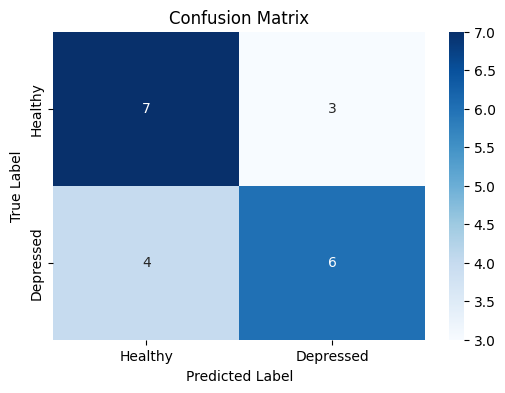

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Healthy", "Depressed"], yticklabels=["Healthy", "Depressed"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# 12 depressed for testing

import os
import librosa
import numpy as np
import requests
import tempfile
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from collections import Counter

X_real_train, y_real_train = [], []

X_real_test, y_real_test = [], []

folders = {
    'depressed': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/depressed',
    'healthy': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/healthy'
}

depressed_samples = []
healthy_samples = []

for label, api_url in folders.items():
    response = requests.get(api_url)
    if response.status_code == 200:
        for f in response.json():
            if f['name'].endswith('.wav'):
                file_url = f"https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/{label}/{f['name']}"
                sample = {
                    "label": 1 if label == "depressed" else 0,
                    "url": file_url
                }
                if label == "depressed":
                    depressed_samples.append(sample)
                else:
                    healthy_samples.append(sample)

depressed_test = depressed_samples[:12]
depressed_train = depressed_samples[12:]

for sample in depressed_train + healthy_samples:
    with tempfile.NamedTemporaryFile(suffix=".wav") as temp_audio:
        r = requests.get(sample['url'])
        temp_audio.write(r.content)
        temp_audio.flush()
        try:
            y_audio, sr = librosa.load(temp_audio.name)
            mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
            log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
            feature = np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])
            X_real_train.append(feature)
            y_real_train.append(sample['label'])
        except Exception as e:
            print(f"Skipped real training sample due to error: {e}")

for sample in depressed_test:
    with tempfile.NamedTemporaryFile(suffix=".wav") as temp_audio:
        r = requests.get(sample['url'])
        temp_audio.write(r.content)
        temp_audio.flush()
        try:
            y_audio, sr = librosa.load(temp_audio.name)
            mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
            log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
            feature = np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])
            X_real_test.append(feature)
            y_real_test.append(1)
        except Exception as e:
            print(f"Skipped test sample due to error: {e}")

X_syn_train, y_syn_train = [], []

for fname in os.listdir("syn_aud"):
    if fname.endswith(".wav"):
        path = os.path.join("syn_aud", fname)
        try:
            y_audio, sr = librosa.load(path)
            mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
            log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
            feature = np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])
            X_syn_train.append(feature)
            y_syn_train.append(1)
        except Exception as e:
            print(f"Skipped synthetic sample due to error: {e}")

# combine training and test sets
X_train = np.array(X_real_train + X_syn_train)
y_train = np.array(y_real_train + y_syn_train)

X_test = np.array(X_real_test)
y_test = np.array(y_real_test)

print("\nSample Counts:")
print("Real training data:", Counter(y_real_train))
print("Synthetic training data:", Counter(y_syn_train))
print("Test data:", Counter(y_test))

# train
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nEvaluation Results")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Classification Report:\n", report)



Sample Counts:
Real training data: Counter({0: 24, 1: 7})
Synthetic training data: Counter({1: 120})
Test data: Counter({np.int64(1): 12})

Evaluation Results
Accuracy: 0.5833333333333334
F1 Score: 0.7368421052631579
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.58      0.74        12

    accuracy                           0.58        12
   macro avg       0.50      0.29      0.37        12
weighted avg       1.00      0.58      0.74        12



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


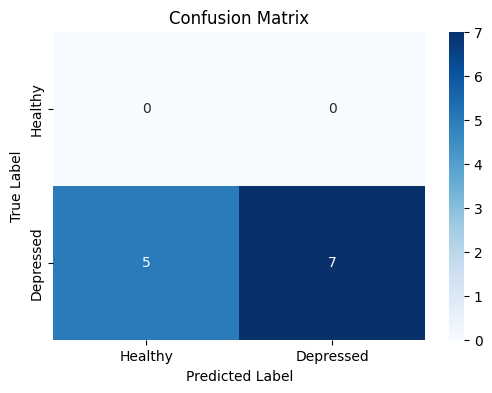

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Healthy", "Depressed"], yticklabels=["Healthy", "Depressed"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# chatterbox
# uploading all synthetic voice files
from google.colab import files
import os

uploaded = files.upload()

# uploaded files
os.makedirs("chatterbox_audio", exist_ok=True)
for fname in uploaded.keys():
    os.rename(fname, f"chatterbox_audio/{fname}")


Saving sample_0.wav to sample_0.wav
Saving sample_1.wav to sample_1.wav
Saving sample_2.wav to sample_2.wav
Saving sample_3.wav to sample_3.wav
Saving sample_4.wav to sample_4.wav
Saving sample_5.wav to sample_5.wav
Saving sample_6.wav to sample_6.wav
Saving sample_7.wav to sample_7.wav
Saving sample_8.wav to sample_8.wav
Saving sample_9.wav to sample_9.wav
Saving sample_10.wav to sample_10.wav
Saving sample_11.wav to sample_11.wav
Saving sample_12.wav to sample_12.wav
Saving sample_13.wav to sample_13.wav
Saving sample_14.wav to sample_14.wav
Saving sample_15.wav to sample_15.wav
Saving sample_16.wav to sample_16.wav
Saving sample_17.wav to sample_17.wav
Saving sample_18.wav to sample_18.wav
Saving sample_19.wav to sample_19.wav
Saving sample_20.wav to sample_20.wav
Saving sample_21.wav to sample_21.wav
Saving sample_22.wav to sample_22.wav
Saving sample_23.wav to sample_23.wav
Saving sample_24.wav to sample_24.wav
Saving sample_25.wav to sample_25.wav
Saving sample_26.wav to sample_2

In [ ]:
import os
import librosa
import numpy as np
import requests
import tempfile
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from collections import Counter

X_real, y_real = [], []

folders = {
    'depressed': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/depressed',
    'healthy': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/healthy'
}

for label, api_url in folders.items():
    response = requests.get(api_url)
    if response.status_code == 200:
        for f in response.json():
            if f['name'].endswith('.wav'):
                file_url = f"https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/{label}/{f['name']}"
                with tempfile.NamedTemporaryFile(suffix=".wav") as temp_audio:
                    r = requests.get(file_url)
                    temp_audio.write(r.content)
                    temp_audio.flush()
                    try:
                        y_audio, sr = librosa.load(temp_audio.name)
                        mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
                        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
                        feature = np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])
                        X_real.append(feature)
                        y_real.append(1 if label == "depressed" else 0)
                    except Exception as e:
                        print(f"Skipped real sample due to error: {e}")

print(f"Loaded {len(X_real)} real audio samples")


X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(
    X_real, y_real, test_size=0.4, random_state=42, stratify=y_real
)


X_syn_train, y_syn_train = [], []

# select first 20 files
syn_files = [f for f in os.listdir("chatterbox_audio") if f.endswith(".wav")]
selected_syn = syn_files[:20]

for fname in selected_syn:
    path = os.path.join("chatterbox_audio", fname)
    try:
        y_audio, sr = librosa.load(path)
        mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        feature = np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])
        X_syn_train.append(feature)
        y_syn_train.append(1)
    except Exception as e:
        print(f"Skipped synthetic sample due to error: {e}")

print(f"Loaded {len(X_syn_train)} synthetic audio samples")


X_train = np.array(X_real_train + X_syn_train)
y_train = np.array(y_real_train + y_syn_train)

X_test = np.array(X_real_test)
y_test = np.array(y_real_test)

print("Final Training Set Size:", len(X_train))
print("Final Test Set Size (Real Only):", len(X_test))


clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("\nEvaluation Results (Tested on Real Audio Only)")
print("Accuracy:", round(accuracy, 4))
print("F1 Score:", round(f1, 4))
print("Classification Report:\n", report)

print("\nSample Breakdown")
print("Training Set:", Counter(y_train))
print("Test Set:", Counter(y_test))


✅ Loaded 43 real audio samples
✅ Loaded 20 synthetic audio samples
📦 Final Training Set Size: 45
📦 Final Test Set Size (Real Only): 18

📊 Evaluation Results (Tested on Real Audio Only)
Accuracy: 0.6111
F1 Score: 0.5333
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.57      0.50      0.53         8

    accuracy                           0.61        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.61      0.61      0.61        18


📈 Sample Breakdown
Training Set: Counter({np.int64(1): 31, np.int64(0): 14})
Test Set: Counter({np.int64(0): 10, np.int64(1): 8})


In [4]:
# gemini 60/40 split
# uploading all synthetic voice files
from google.colab import files
import os

uploaded = files.upload()

# uploaded files
os.makedirs("syn_aud", exist_ok=True)
for fname in uploaded.keys():
    os.rename(fname, f"syn_aud/{fname}")


Saving train_sample_0.wav to train_sample_0.wav
Saving train_sample_1.wav to train_sample_1.wav
Saving train_sample_2.wav to train_sample_2.wav
Saving train_sample_3.wav to train_sample_3.wav
Saving train_sample_4.wav to train_sample_4.wav
Saving train_sample_5.wav to train_sample_5.wav
Saving train_sample_6.wav to train_sample_6.wav
Saving train_sample_7.wav to train_sample_7.wav
Saving train_sample_8.wav to train_sample_8.wav
Saving train_sample_9.wav to train_sample_9.wav
Saving train_sample_10.wav to train_sample_10.wav
Saving train_sample_11.wav to train_sample_11.wav
Saving train_sample_12.wav to train_sample_12.wav
Saving train_sample_13.wav to train_sample_13.wav
Saving train_sample_14.wav to train_sample_14.wav
Saving train_sample_15.wav to train_sample_15.wav
Saving train_sample_16.wav to train_sample_16.wav
Saving train_sample_17.wav to train_sample_17.wav
Saving train_sample_18.wav to train_sample_18.wav
Saving train_sample_19.wav to train_sample_19.wav
Saving train_sample_

In [ ]:
import os
import librosa
import numpy as np
import requests
import tempfile
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from collections import Counter

X_real, y_real = [], []

folders = {
    'depressed': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/depressed',
    'healthy': 'https://api.github.com/repos/FIU-MOSAIC/REU_sample/contents/speech_depression/healthy'
}

for label, api_url in folders.items():
    response = requests.get(api_url)
    if response.status_code == 200:
        for f in response.json():
            if f['name'].endswith('.wav'):
                file_url = f"https://raw.githubusercontent.com/FIU-MOSAIC/REU_sample/main/speech_depression/{label}/{f['name']}"
                with tempfile.NamedTemporaryFile(suffix=".wav") as temp_audio:
                    r = requests.get(file_url)
                    temp_audio.write(r.content)
                    temp_audio.flush()
                    try:
                        y_audio, sr = librosa.load(temp_audio.name)
                        mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
                        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
                        feature = np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])
                        X_real.append(feature)
                        y_real.append(1 if label == "depressed" else 0)
                    except Exception as e:
                        print(f"Skipped real sample due to error: {e}")

print(f"Loaded {len(X_real)} real audio samples")


X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(
    X_real, y_real, test_size=0.4, random_state=42, stratify=y_real
)


X_syn_train, y_syn_train = [], []

# select first 20 files
syn_files = [f for f in os.listdir("syn_aud") if f.endswith(".wav")]
selected_syn = syn_files[:120]
for fname in selected_syn:
    path = os.path.join("syn_aud", fname)
    try:
        y_audio, sr = librosa.load(path)
        mel_spec = librosa.feature.melspectrogram(y=y_audio, sr=sr, n_mels=128)
        log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        feature = np.concatenate([np.mean(log_mel_spec, axis=1), np.std(log_mel_spec, axis=1)])
        X_syn_train.append(feature)
        y_syn_train.append(1)
    except Exception as e:
        print(f"Skipped synthetic sample due to error: {e}")

print(f"Loaded {len(X_syn_train)} synthetic audio samples")


X_train = np.array(X_real_train + X_syn_train)
y_train = np.array(y_real_train + y_syn_train)

X_test = np.array(X_real_test)
y_test = np.array(y_real_test)

print("Final Training Set Size:", len(X_train))
print("Final Test Set Size (Real Only):", len(X_test))

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("\nEvaluation Results (Tested on Real Audio Only)")
print("Accuracy:", round(accuracy, 4))
print("F1 Score:", round(f1, 4))
print("Classification Report:\n", report)

print("\nSample Breakdown")
print("Training Set:", Counter(y_train))
print("Test Set:", Counter(y_test))
